In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



In [ ]:


# Importar el archivo CSV
ruta_csv = r"..\Datasets\FILTRADO\filtro_Indiana.csv"
df = pd.read_csv(ruta_csv)

# Importar el archivo de sitios
sitio_csv = r"C:\Users\pablo\OneDrive\Documentos\CURSOS\HENRY\PROYECTO FINAL\Datasets\FILTRADO\sitios_filtrado.csv"
df_sitio = pd.read_csv(sitio_csv)


In [3]:
df_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN,33.916402,-118.010855,['Restaurant'],4.5,18,NaN,"[['Thursday', '11AM–9:30PM'], ['Friday', '11AM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,NaN,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,NaN,"[['Thursday', '10AM–5:30PM'], ['Friday', '10AM...",{'Service options': ['Delivery']},Permanently closed,"['0x87ee974869295555:0x95f310d065882c9b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,['Restaurant'],4.0,8,NaN,NaN,"{'Service options': ['Delivery'], 'Amenities':...",NaN,"['0x89c6c62a40f4b733:0x73bfeec1898f272b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,NaN,21.637796,-157.920714,['Restaurant'],4.4,18,NaN,"[['Thursday', '11AM–8PM'], ['Friday', '11AM–8P...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"['0x7c00451360f80cf1:0x930291a38bab3132', '0x7...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
df.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,113746425579483042024,Tim McCarthy,1521171006574,1,"Terrible, terrible service. Was ignored at th...",NaN,NaN,0x8811ec192b7115a5:0x80a72a20ed09479
1,114875073075229655498,lasandre polk,1562987324932,1,I had to pat my fish in paper towels because o...,NaN,NaN,0x8811ec192b7115a5:0x80a72a20ed09479
2,109343638490189125487,frank chervenko,1550030007760,1,You have lost my businese.... tonight order a ...,NaN,NaN,0x8811ec192b7115a5:0x80a72a20ed09479
3,102486847759678206757,LaVaughn Scott,1553502978875,5,Great food and service,NaN,NaN,0x8811ec192b7115a5:0x80a72a20ed09479
4,108988628325796350264,Keith Parker,1533649541405,5,Great sea food.,NaN,NaN,0x8811ec192b7115a5:0x80a72a20ed09479


In [5]:
df = df.merge(df_sitio[['gmap_id', 'name']], on='gmap_id', how='left')

In [6]:
# Cambiar el nombre de las columnas name_x y name_y
df = df.rename(columns={'name_x': 'name', 'name_y': 'name_sitio'})

In [7]:
# Cantidad de filas y columnas
df.shape

(305721, 9)

In [8]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id       object
name          object
time           int64
rating         int64
text          object
pics          object
resp          object
gmap_id       object
name_sitio    object
dtype: object


In [9]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'name_sitio'],
      dtype='object')

In [10]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [11]:
df.duplicated().sum()

12915

In [12]:
# Filas duplicadas (incluyendo los originales)
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)


                      user_id             name           time  rating  \
155813  100003822105769944412       Shay Terry  1562010931632       5   
155833  100003822105769944412       Shay Terry  1562010931632       5   
61467   100005632164194805486      Connie Bell  1523985710154       5   
61477   100005632164194805486      Connie Bell  1523985710154       5   
119256  100006689328388690187   David Peterson  1479254072205       5   
...                       ...              ...            ...     ...   
115275  118442596975155818162       Edna Davie  1618093104693       5   
77598   118444620697031901158    Geoffrey Yost  1534530710416       2   
77608   118444620697031901158    Geoffrey Yost  1534530710416       2   
67354   118446650219804763786  Joseph Uncapher  1478387425831       3   
67355   118446650219804763786  Joseph Uncapher  1478387425831       3   

                                                     text  pics  \
155813          Gotta love the endless shrimp on Mondays

In [13]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [14]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id            0
name               7
time               0
rating             0
text          127712
pics          286129
resp          259006
gmap_id            0
name_sitio         0
dtype: int64

In [15]:
# Porcentaje de valores nulos por columna
(df.isnull().mean() * 100)

user_id        0.000000
name           0.002391
time           0.000000
rating         0.000000
text          43.616593
pics          97.719651
resp          88.456521
gmap_id        0.000000
name_sitio     0.000000
dtype: float64

In [16]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,time,rating
count,2.928060e+05,292806.000000
mean,1.554607e+12,4.196881
std,4.097036e+10,1.144044
min,1.239632e+12,1.000000
25%,1.527696e+12,4.000000
50%,1.556248e+12,5.000000
75%,1.581806e+12,5.000000
max,1.630842e+12,5.000000


In [17]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 31203


In [18]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

time: 2163 outliers
rating: 29040 outliers


In [19]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1521171006574 2018-03-16 03:30:06.574
2  1562987324932 2019-07-13 03:08:44.932
4  1550030007760 2019-02-13 03:53:27.760
6  1553502978875 2019-03-25 08:36:18.875
8  1533649541405 2018-08-07 13:45:41.405


In [20]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,name_sitio,fecha
0,113746425579483042024,Tim McCarthy,1521171006574,1,"Terrible, terrible service. Was ignored at th...",<NA>,<NA>,0x8811ec192b7115a5:0x80a72a20ed09479,Long John Silver's,2018-03-16 03:30:06.574
2,114875073075229655498,lasandre polk,1562987324932,1,I had to pat my fish in paper towels because o...,<NA>,<NA>,0x8811ec192b7115a5:0x80a72a20ed09479,Long John Silver's,2019-07-13 03:08:44.932
4,109343638490189125487,frank chervenko,1550030007760,1,You have lost my businese.... tonight order a ...,<NA>,<NA>,0x8811ec192b7115a5:0x80a72a20ed09479,Long John Silver's,2019-02-13 03:53:27.760
6,102486847759678206757,LaVaughn Scott,1553502978875,5,Great food and service,<NA>,<NA>,0x8811ec192b7115a5:0x80a72a20ed09479,Long John Silver's,2019-03-25 08:36:18.875
8,108988628325796350264,Keith Parker,1533649541405,5,Great sea food.,<NA>,<NA>,0x8811ec192b7115a5:0x80a72a20ed09479,Long John Silver's,2018-08-07 13:45:41.405


# Análisis de Rating

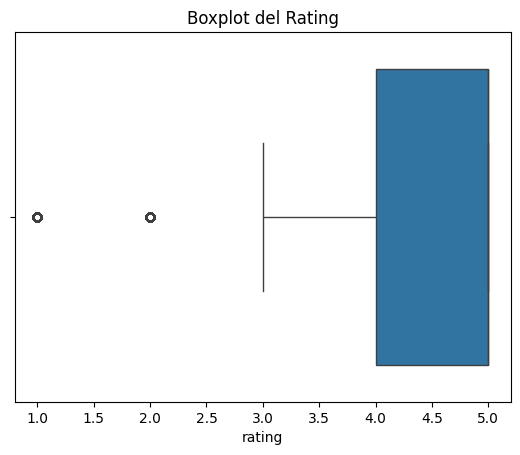

In [21]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

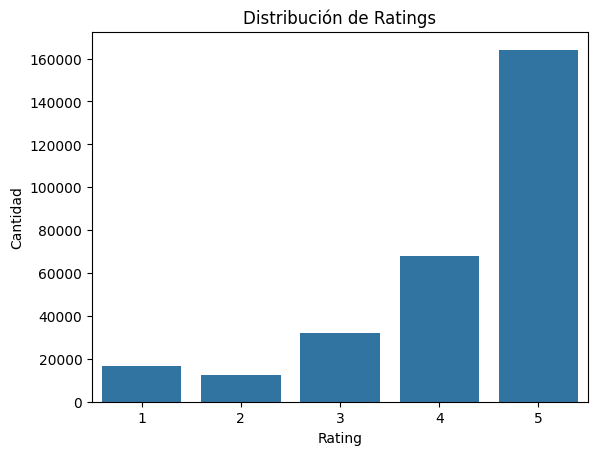

In [22]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()


In [23]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1     16478            5.63
2            2     12562            4.29
3            3     31914           10.90
4            4     67732           23.13
5            5    164120           56.05


Análisis:

Más del 79% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 9% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.


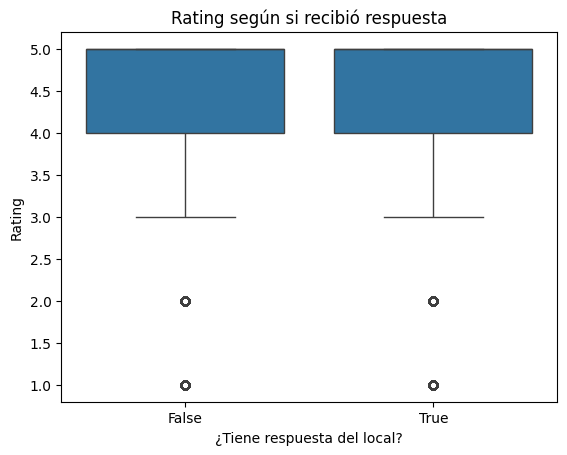

In [24]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

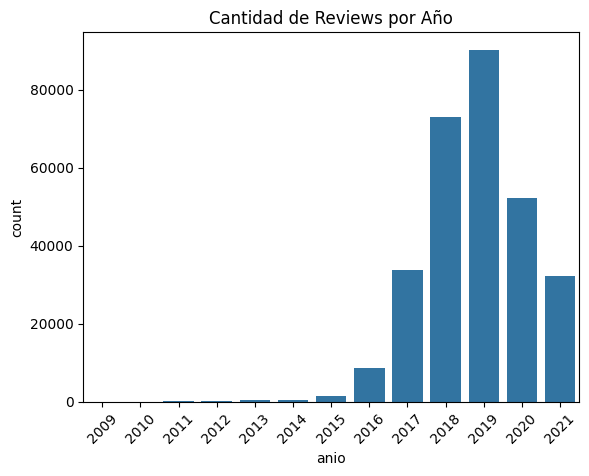

In [25]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2009                    3
1   2010                   68
2   2011                  196
3   2012                  272
4   2013                  361
5   2014                  429
6   2015                 1394
7   2016                 8602
8   2017                33883
9   2018                72965
10  2019                90225
11  2020                52221
12  2021                32187


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 90225 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [27]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 165094 (56.38%)
Reviews con fotos: 6677 (2.28%)
Reviews con respuesta: 33800 (11.54%)


In [28]:
print("Lugares únicos (gmap_id):", df['name_sitio'].nunique())

Lugares únicos (gmap_id): 1827


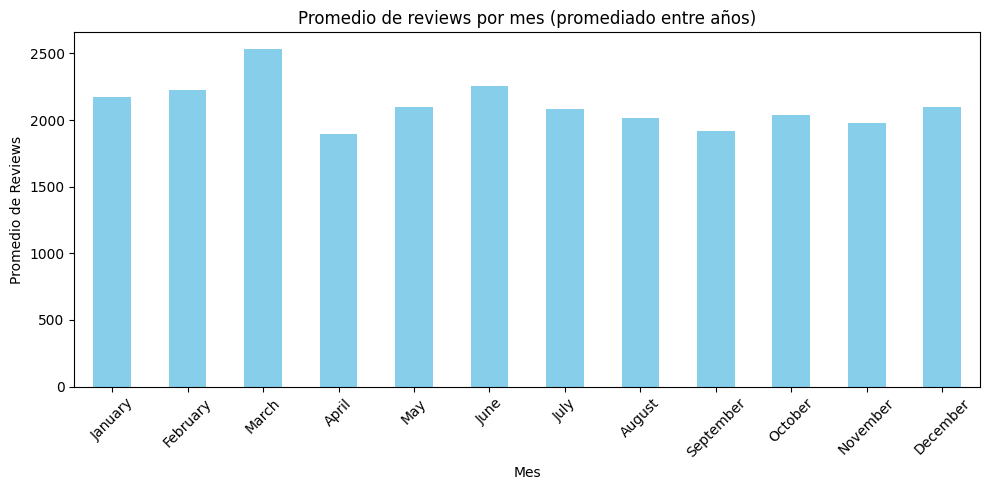

In [29]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January              2172.17
1    February              2226.25
2       March              2531.55
3       April              1893.75
4         May              2095.08
5        June              2252.36
6        July              2079.50
7      August              2016.92
8   September              1919.17
9     October              2041.00
10   November              1980.91
11   December              2100.73


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, marzo y junio muestran una actividad más fuerte en promedio.

Meses más bajos: abril y septiembre
Estos meses tienden a tener menos reseñas en comparación con otros. Esto podría deberse a
temporada baja de turismo o consumo, 
condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.

# Análisis de Lugares

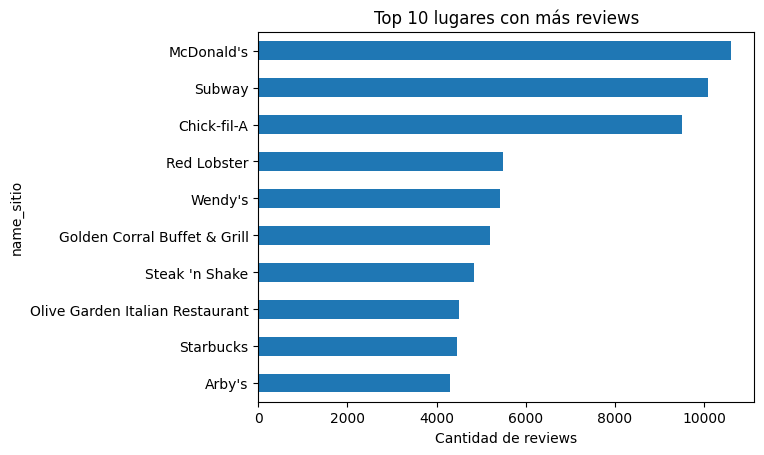

In [31]:
top_lugares = df['name_sitio'].value_counts().head(10)
top_lugares.plot(kind='barh')
plt.title("Top 10 lugares con más reviews")
plt.xlabel("Cantidad de reviews")
plt.ylabel("name_sitio")
plt.gca().invert_yaxis()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_4188\273206112.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')


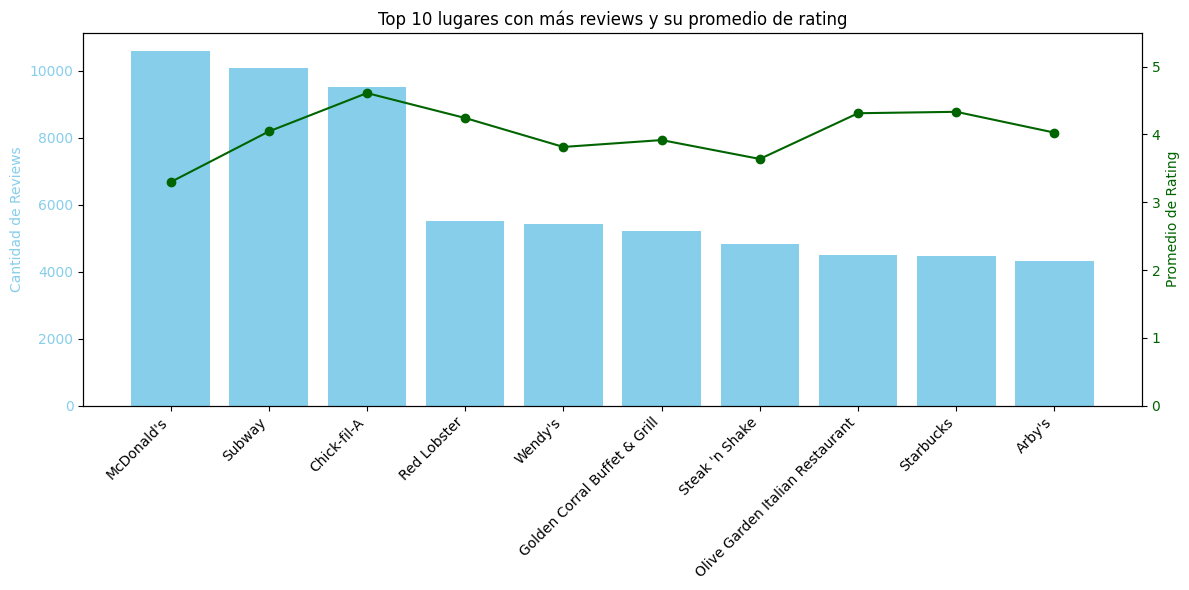

In [32]:
# Agrupar por lugar: contar y promediar ratings
estadisticas = df.groupby('name_sitio')['rating'].agg(['count', 'mean']).reset_index()
estadisticas.columns = ['name_sitio', 'Cantidad de Reviews', 'Promedio de Rating']

# Filtrar lugares con al menos 50 reviews
estadisticas_filtradas = estadisticas[estadisticas['Cantidad de Reviews'] >= 50]

# Elegir los 10 lugares con más reviews (para orden visual claro)
top10 = estadisticas_filtradas.sort_values(by='Cantidad de Reviews', ascending=False).head(10)

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: cantidad de reviews
ax1.bar(top10['name_sitio'], top10['Cantidad de Reviews'], color='skyblue', label='Cantidad de Reviews')
ax1.set_ylabel('Cantidad de Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')

# Eje derecho: promedio de rating
ax2 = ax1.twinx()
ax2.plot(top10['name_sitio'], top10['Promedio de Rating'], color='darkgreen', marker='o', label='Promedio de Rating')
ax2.set_ylabel('Promedio de Rating', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.set_ylim(0, 5.5)

# Título y leyenda
plt.title('Top 10 lugares con más reviews y su promedio de rating')
fig.tight_layout()
plt.show()



Análisis:
Todos los lugares del top tienen un rating promedio alto, mayor a 3, lo que muestra una alta satisfacción de los usuarios.

La cantidad de reviews varía, pero todos superan las 4000, lo cual da más confianza en la calidad del promedio.

McDonal's a pesar de tener el numero mayor de review tiene el promedio de rating mas bajo.

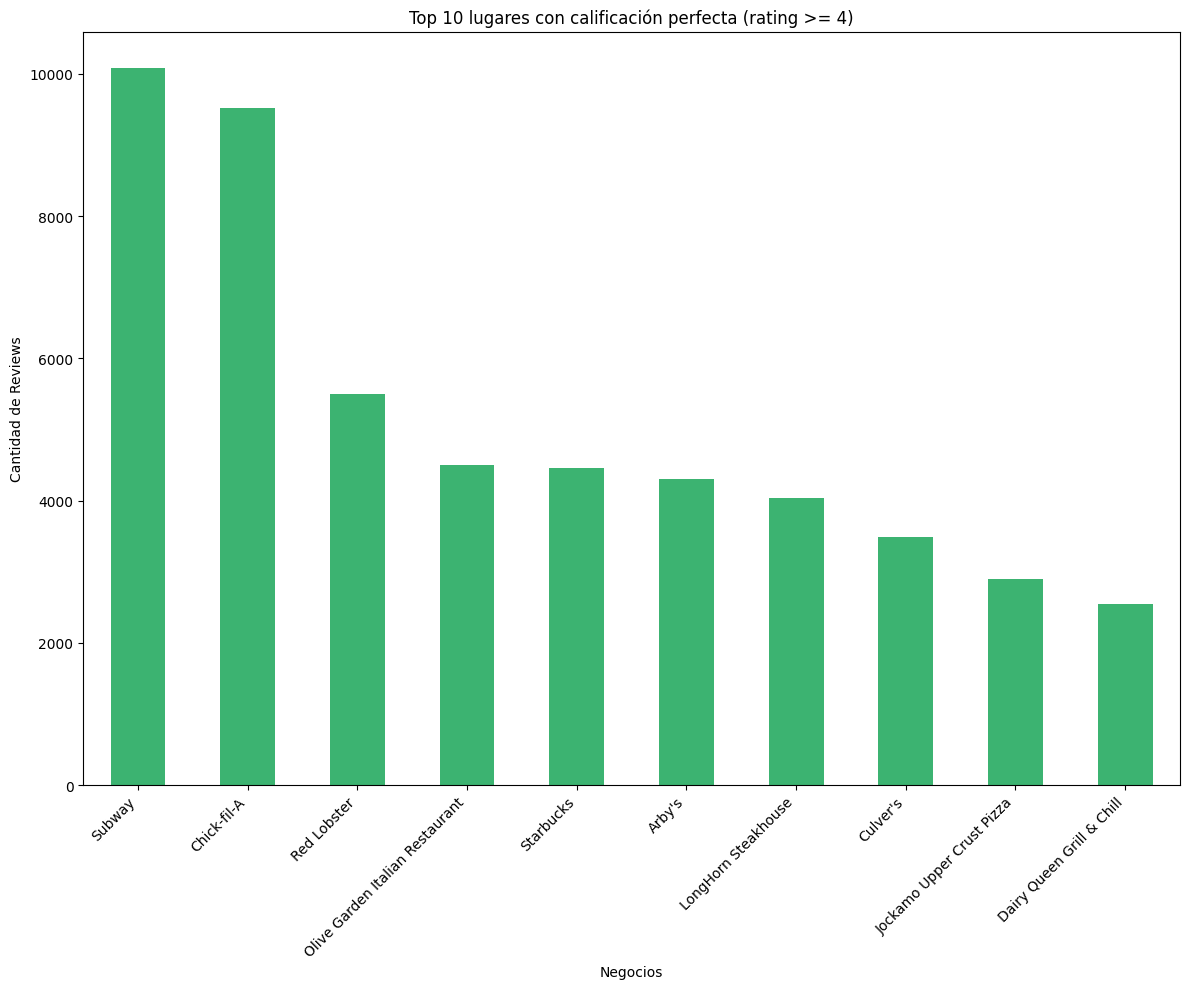

In [33]:
# Asegurar que la fecha esté en formato datetime (por si acaso)
df['fecha'] = pd.to_datetime(df['time'], unit='ms')

# Calcular el promedio de rating por lugar (gmap_id)
rating_promedio = df.groupby('name_sitio')['rating'].mean()

# Filtrar lugares con calificación perfecta
rating_maximos = rating_promedio[rating_promedio >= 4]

# Filtrar el DataFrame original para obtener solo esos lugares
top_rating_5 = df[df['name_sitio'].isin(rating_maximos.index)]

# Contar cantidad de reviews por gmap_id con rating >= 4 y quedarnos con los 10 más reseñados
top_rating_5_count = top_rating_5['name_sitio'].value_counts().head(10)

# Graficar
plt.figure(figsize=(12, 10))
top_rating_5_count.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 lugares con calificación perfecta (rating >= 4)")
plt.xlabel("Negocios")
plt.ylabel("Cantidad de Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Análisis:

Alta satisfacción con volumen relevante, todos los lugares listados tienen una combinación ideal de rating alto y muchas reseñas. Eso indica que no solo tuvieron buena suerte con pocas opiniones, sino que muchos usuarios coincidieron en su buena experiencia. Se marca la diferencia de los negocios Subway y Chick-fil-A por la cantidad de reviews.

Estos 10 lugares combinan excelencia en atención/producto con volumen de participación de usuarios, lo que los posiciona como referentes en calidad y satisfacción.